In [ ]:
# need to run this to get the authorization token
# also need to be signed up to use earth engine
import ee

ee.Authenticate()

ee.Initialize()

ModuleNotFoundError: No module named 'earthengine'

In [ ]:
from numpy.fft import rfftn
from numpy.fft import irfftn
from numpy.fft import fftshift

def CrossCorrelation(vox1,vox2,remove_median =  True):
    siz = np.array(vox1.shape)*2 # nb both voxels should be the same shape

    if(remove_median):
      vox1 -= np.median( vox1 );
      vox2 -= np.median( vox2 );


    # cross correlation - padded with zeros
    rv = np.real(fftshift(irfftn( np.conj(rfftn(vox1,siz)) * rfftn(vox2,siz) )))

    return rv


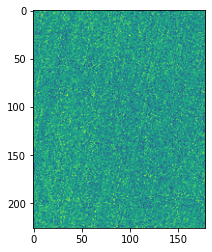

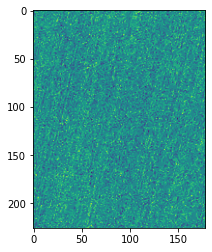

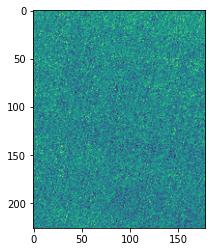

<Figure size 432x288 with 0 Axes>

In [ ]:
import ee

import folium

import time

import numpy as np
import pylab as pl

ee.Initialize()


# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

#########################

"""
dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1')


rgbVis = {
  "bands": ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 30000.0
};
"""


#dataset = ee.ImageCollection('COPERNICUS/S2').filterDate(ee.Date('2022-03-01'), ee.Date('2022-05-01'))
dataset = ee.ImageCollection('COPERNICUS/S2').filterDate(ee.Date('2022-01-01'), ee.Date('2022-03-01'))


                #  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
                #  .map(maskS2clouds)

                 # .filterDate('2018-01-01', '2018-06-30')
                 # .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))


#dataset = ee.ImageCollection("COPERNICUS/S2")
rgbVis = {
  "min": 0.0,
  "max": 3000.,
  "gamma":1.6,
  #"bands": ['B8', 'B8', 'B8'],
  "bands": ['B4', 'B3', 'B2'],
};

# Define arguments for animation function parameters.
videoArgs = {
  "dimensions": 200,
  "min": 0.0,
  "max": 3000.,
  "gamma":1.6,
  #"bands": ['B8', 'B8', 'B8'],
  "bands": ['B4', 'B3', 'B2'],
  #region: aoi,
  #framesPerSecond: 7,
  #crs: 'EPSG:3857',
  #min: -40.0,
  #max: 35.0,
  #palette: ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']
};



mineCoordList = [[151.7232483,-23.53207833]]

mineCoordList = [[136.252119,-24.764568]]


mineCoordList = [[136,-24.764568]]
mineCoordList = [[145,-39]]



doNonMine = False

for i in range(1):

  lat = mineCoordList[i][1]
  lon = mineCoordList[i][0]
  if doNonMine:  #random for non-mine images
    lat = mineCoordList[i][1] + (20+30*np.random.rand())*0.01
    lon = mineCoordList[i][0] + (20+30*np.random.rand())*0.01
  rectangle = ee.Geometry.Rectangle( lon-0.01,lat-0.01,  lon+0.01,lat+0.01)
  xy = ee.Geometry.Point([lon, lat])

  #videoArgs["region"] = rectangle

  #dataset = dataset.sort('CLOUDY_PIXEL_PERCENTAGE')

  dataset = dataset.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 50))
  #datasetImg = datasetFl.median()
  datasetFl = dataset.filterBounds(rectangle)

  #url = datasetFl.getVideoThumbURL(videoArgs)
  #print(url)

  datasetImg = datasetFl.first()
  #datasetImg = datasetFl.median()

  bandArrs = datasetImg.sampleRectangle(rectangle)
  bandArr_B4 = bandArrs.get("B4")
  bandArr_B3 = bandArrs.get("B3")
  bandArr_B2 = bandArrs.get("B2")

  # https://gisgeography.com/sentinel-2-bands-combinations/
  npArray_B4 = np.array(bandArr_B4.getInfo())
  npArray_B3 = np.array(bandArr_B3.getInfo())
  npArray_B2 = np.array(bandArr_B2.getInfo())

  pl.imshow(npArray_B3)
  pl.figure()
  pl.imshow(npArray_B4)
  pl.figure()
  pl.imshow(npArray_B2)
  #pl.show()



  doDisplay = True

  if doDisplay:
    pl.figure()
    my_map = folium.Map(location=[lat, lon], zoom_start=15, height=500)
    # Add the elevation model to the map object.
    my_map.add_ee_layer(datasetImg, rgbVis, 'RGB')

    my_map.add_child(folium.LayerControl())
    folium.Marker([lat,lon], tooltip="you are here").add_to(my_map)

    display(my_map)



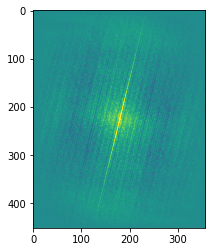

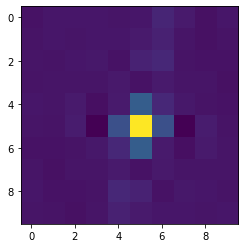

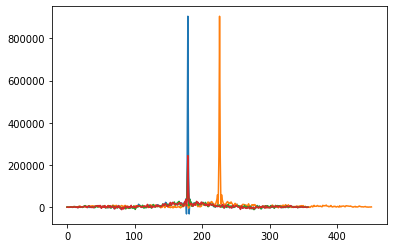

In [ ]:
npArray_B3_db = np.array(npArray_B3, dtype=float)
cc =CrossCorrelation(npArray_B3_db,npArray_B3_db)

cx,cy = npArray_B3_db.shape #center of cross correlation

cutoff = 1*cc[cx-1,cy-1]
pl.imshow(cc, vmax=cutoff)


pl.figure()

pl.imshow(cc[cx-5:cx+5,cy-5:cy+5])

pl.figure()

pl.plot(cc[cx,:])
pl.plot(cc[:,cy])
pl.plot(cc[cx+1,:])
pl.plot(cc[cx-1,:])

In [ ]:
import ee

import folium

import time

import numpy as np

ee.Initialize()


# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

#########################

"""
dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1')


rgbVis = {
  "bands": ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 30000.0
};
"""


dataset = ee.ImageCollection('COPERNICUS/S2').filterDate(ee.Date('2019-01-01'), ee.Date('2019-1-31'))


                #  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
                #  .map(maskS2clouds)

                 # .filterDate('2018-01-01', '2018-06-30')
                 # .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))


#dataset = ee.ImageCollection("COPERNICUS/S2")
rgbVis = {
  "min": 0.0,
  "max": 3000.,
  "gamma":1.6,
  #"bands": ['B8', 'B8', 'B8'],
  "bands": ['B4', 'B3', 'B2'],
};


mineCoordList = [[144.9631,-37.8136]]  # Melb
mineCoordList = [[147.9958,-37.8511]]

doNonMine = False
# i = 252 is Christmas island (seems like it is not covered by Landsat)
for i in range(1):

  lat = mineCoordList[i][1]
  lon = mineCoordList[i][0]
  if doNonMine:  #random for non-mine images
    lat = mineCoordList[i][1] + (20+30*np.random.rand())*0.01
    lon = mineCoordList[i][0] + (20+30*np.random.rand())*0.01
  rectangle = ee.Geometry.Rectangle( lon-0.5,lat-0.5,  lon+0.5,lat+0.5)
  xy = ee.Geometry.Point([lon, lat])

  #dataset = dataset.sort('CLOUDY_PIXEL_PERCENTAGE')
  dataset = dataset.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20))
  #datasetImg = datasetFl.median()
  datasetFl = dataset.filterBounds(rectangle)
  #datasetImg = datasetFl.first()
  datasetImg = datasetFl.median()

  doDisplay = True

  if doDisplay:
    my_map = folium.Map(location=[lat, lon], zoom_start=10, height=500)
    # Add the elevation model to the map object.
    my_map.add_ee_layer(datasetImg, rgbVis, 'RGB')

    my_map.add_child(folium.LayerControl())
    folium.Marker([lat,lon], tooltip="you are here").add_to(my_map)

    display(my_map)

ModuleNotFoundError: No module named 'ee'